<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Roll Number = 191EE123 <br> a = 1 + mod(123,4) = 4

In [2]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft



a = 4
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "axes.labelsize": 15,
    "axes.title"
    "font.size": 8})


Problem 1.

In [3]:
t = np.linspace(0,10,100)
plot = ['exp(-t/4)', 'exp(-(t - 6)/4)', 'exp(-2t/4)']
exp_function_1 = np.exp(-t/a)
exp_function_2 = np.exp(-(t-1.5*a)/a)
exp_function_3 = np.exp(-(2*t)/a)

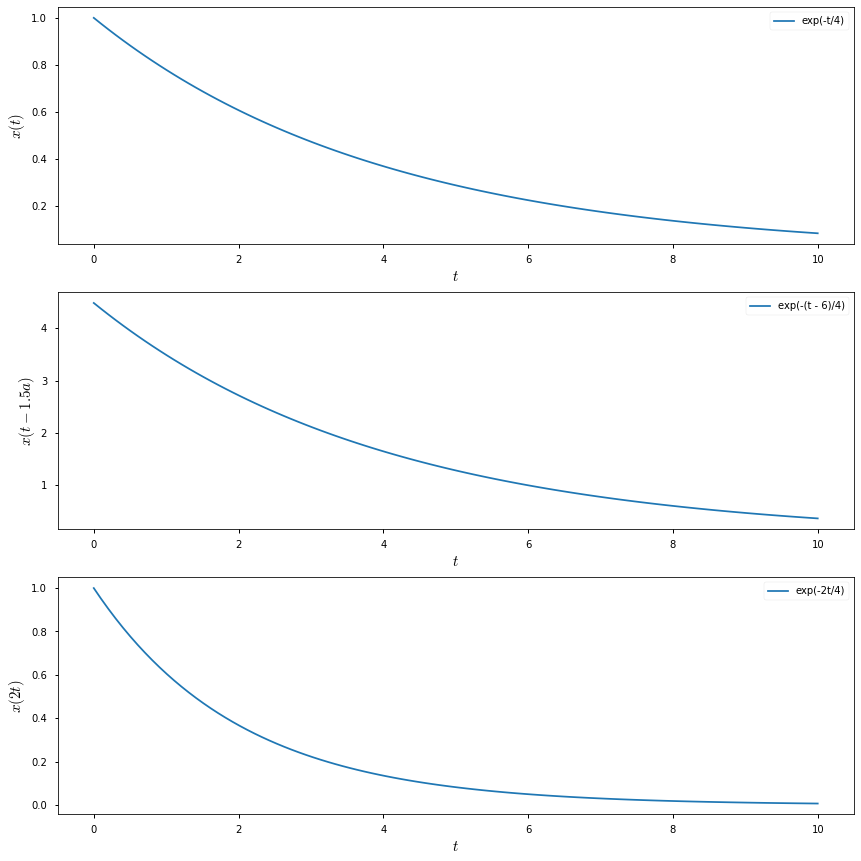

In [4]:
fig, axs = plt.subplots(3, figsize=(12,12))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y, label = plot[row])
    axs[row].legend(loc = 'upper right')
    axs[row].set(xlabel = xaxis_label, ylabel = yaxis_label)
    #axs[row].set_yticks(np.arange(0, max(y), 1))
    fig.tight_layout()
    
plot_signal(t, exp_function_1, xaxis_label=r'$t$', yaxis_label=r'$x(t)$', row=0)
plot_signal(t, exp_function_2, xaxis_label=r'$t$', yaxis_label=r'$x(t-1.5a)$', row=1)
plot_signal(t, exp_function_3, xaxis_label=r'$t$', yaxis_label=r'$x(2t)$', row=2)

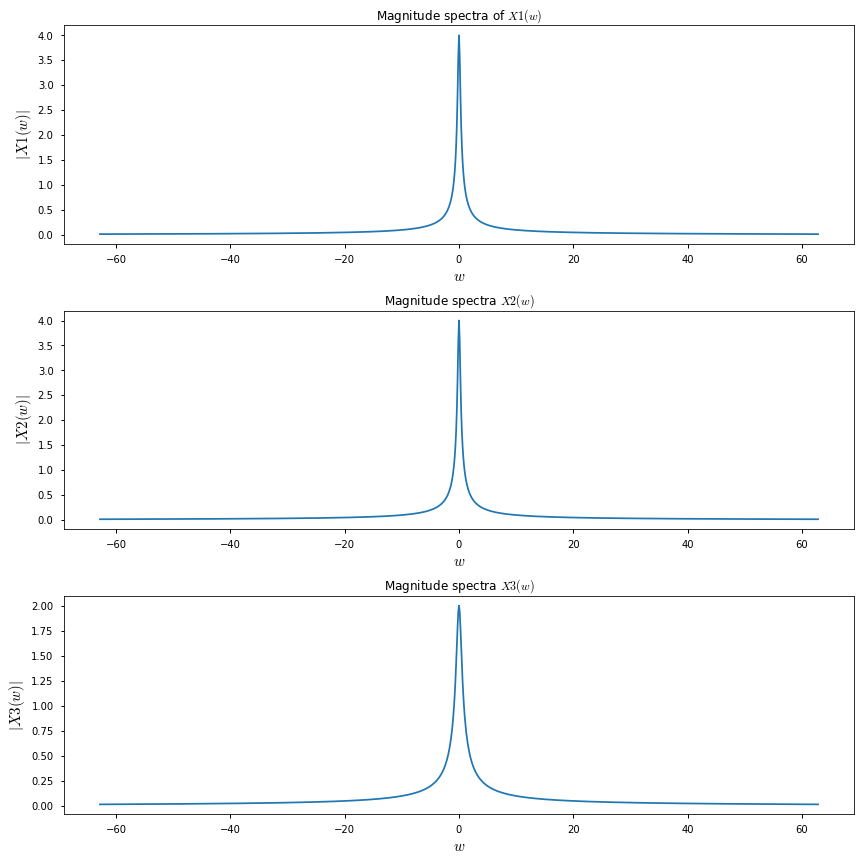

In [19]:
#Fourier Transforms
w = 2*pi*np.linspace(-10,10,num = 1001)
X1 = 1/(1j*w + (1/a))
X2 = (np.exp(-1j*w*(1.5*a)))/(1j*w + (1/a)) #X2 = X1(w)* exp(-jw(1.5*a)) (Shifting property)
X3 = 0.5 * 1/((1j*w*0.5)+(1/a)) # X3 = 1/2 * X1(w/2) (Scaling property)

#Plotting Magnitude spectra
fig, axs = plt.subplots(3, figsize=(12,12))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):   
    axs[row].plot(x, y)
    axs[row].set(xlabel = xaxis_label, ylabel = yaxis_label)

plot_signal(w, np.abs(X1), xaxis_label=r'$w$', yaxis_label=r'$|X1(w)|$', row=0)
plot_signal(w, np.abs(X2), xaxis_label=r'$w$', yaxis_label=r'$|X2(w)|$', row=1)
plot_signal(w, np.abs(X3), xaxis_label=r'$w$', yaxis_label=r'$|X3(w)|$', row=2)
axs[0].set_title("Magnitude spectra of $X1(w)$")
axs[1].set_title("Magnitude spectra $X2(w)$")
axs[2].set_title("Magnitude spectra $X3(w)$")
fig.tight_layout()

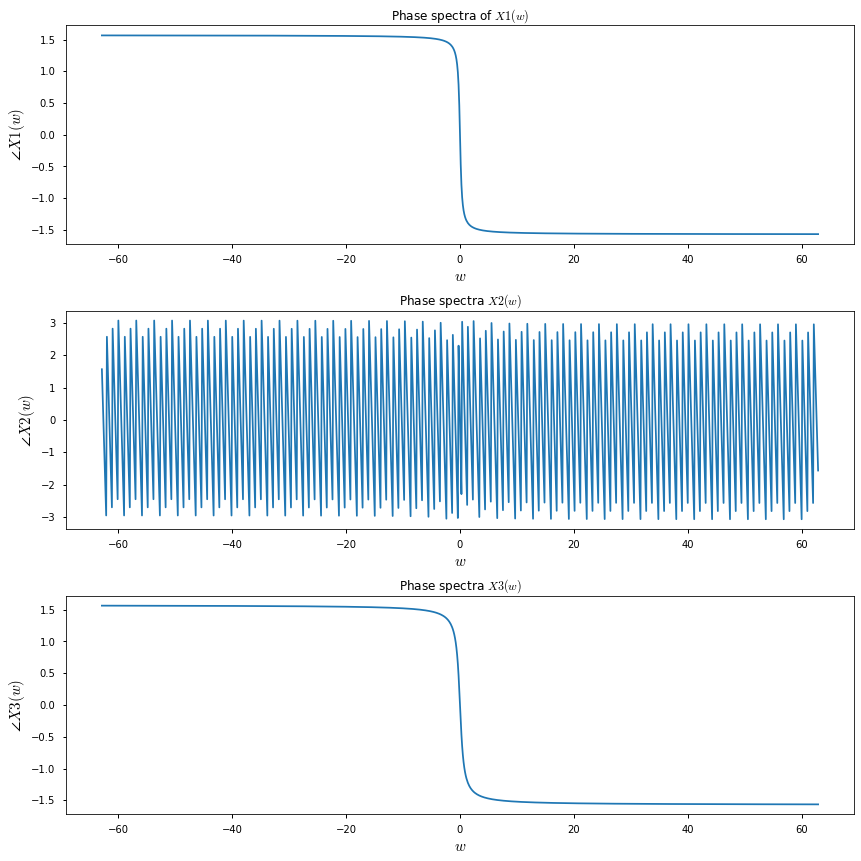

In [18]:
fig, axs = plt.subplots(3, figsize=(12,12))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):   
    axs[row].plot(x, y)
    axs[row].set(xlabel = xaxis_label, ylabel = yaxis_label)
    
plot_signal(w, np.angle(X1), xaxis_label=r'$w$', yaxis_label=r'$\angle$$X1(w)$', row=0)
plot_signal(w, np.angle(X2), xaxis_label=r'$w$', yaxis_label=r'$\angle$$X2(w)$', row=1)
plot_signal(w, np.angle(X3), xaxis_label=r'$w$', yaxis_label=r'$\angle$$X3(w)$', row=2)
axs[0].set_title("Phase spectra of $X1(w)$")
axs[1].set_title("Phase spectra $X2(w)$")
axs[2].set_title("Phase spectra $X3(w)$")
fig.tight_layout()

Probelm 2.


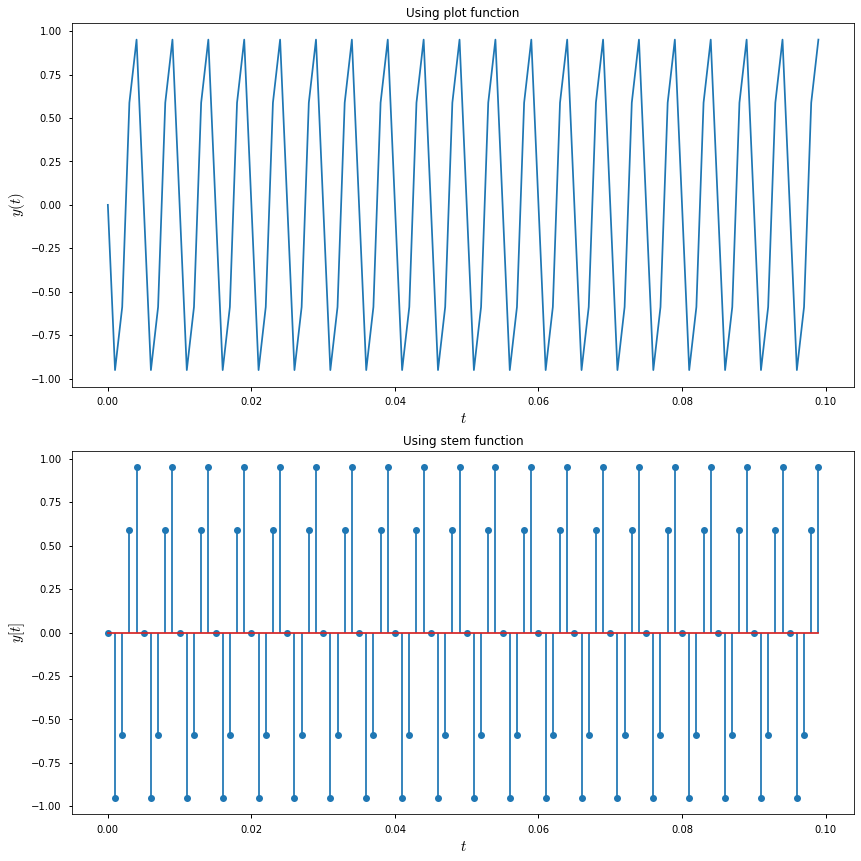

In [20]:
f1 = 200*a
f2 = 220*a
t = np.linspace(0,4.999,5000)
y1 = np.sin(2*pi*f1*t)
y2 = np.sin(2*pi*f2*t)
y = np.append(y1,y2)

fs = 1000
display(Audio(data=y, rate=fs))
wavfile.write('Q2_Appended_signal.wav',fs,y.astype(np.float32))

fig, axs = plt.subplots(2, figsize=(12,12))
axs[0].plot(t[:100], y[:100])
axs[0].set_title("Using plot function")
axs[0].set(xlabel = r'$t$', ylabel = r'$y(t)$')
axs[1].stem(t[:100], y[:100], use_line_collection = True)
axs[1].set_title("Using stem function")
axs[1].set(xlabel = r'$t$', ylabel = r'$y[t]$')
fig.tight_layout()






Problem 3.

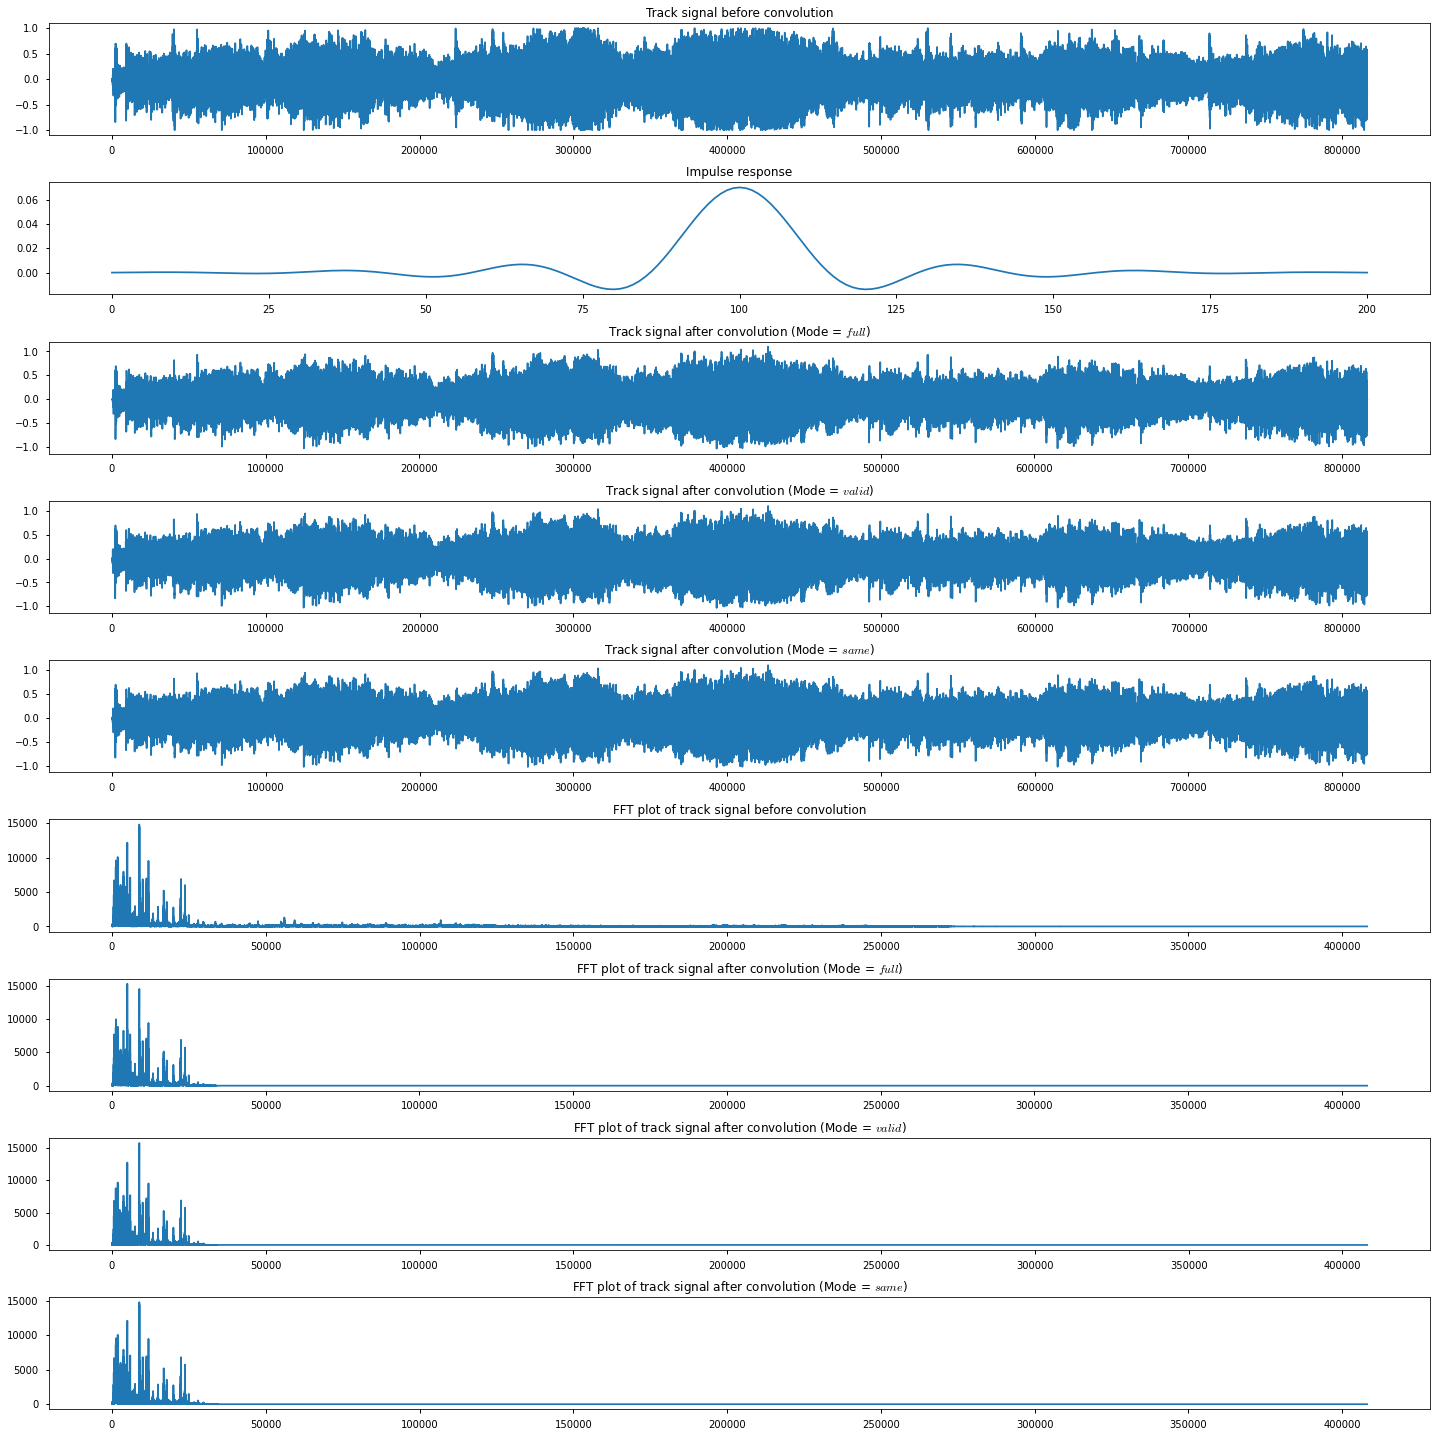

In [30]:
conv_text = np.loadtxt('ConvFile4.txt', dtype=float)
F, track = wavfile.read('Track004.wav')
track = track/32767.0
#mode = full
convolved_signal_mode1 = sp.convolve(track,conv_text)
display(Audio(data=track, rate=F))
display(Audio(data=convolved_signal_mode1, rate=F))
wavfile.write('Q3_convolved_signal_mode1.wav', F, (convolved_signal_mode1).astype(np.float32))
X=fft(np.array(track)) 
d = len(X)//2  # we only need half of the fft list (real signal symmetry)
Y1=fft(np.array(convolved_signal_mode1))
e1 = len(Y1)//2 
#mode = valid
convolved_signal_mode2 = sp.convolve(track,conv_text, mode='valid')
display(Audio(data=convolved_signal_mode2, rate=F))
wavfile.write('Q3_convolved_signal_mode2.wav', F, (convolved_signal_mode2).astype(np.float32))
Y2=fft(np.array(convolved_signal_mode2))
e2 = len(Y2)//2 
#mode = same
convolved_signal_mode3 = sp.convolve(track,conv_text, mode='same')
display(Audio(data=convolved_signal_mode3, rate=F))
wavfile.write('Q3_convolved_signal_mode3.wav', F, (convolved_signal_mode3).astype(np.float32))
Y3=fft(np.array(convolved_signal_mode3))
e3 = len(Y3)//2 

fig, axs = plt.subplots(9, figsize=(20,20))
axs[0].plot(track)
axs[0].set_title("Track signal before convolution")
axs[1].plot(conv_text)
axs[1].set_title("Impulse response")
axs[2].plot(convolved_signal_mode1)
axs[2].set_title("Track signal after convolution (Mode = $full$)")
axs[3].plot(convolved_signal_mode2)
axs[3].set_title("Track signal after convolution (Mode = $valid$)")
axs[4].plot(convolved_signal_mode3)
axs[4].set_title("Track signal after convolution (Mode = $same$)")
axs[5].plot(np.abs(X[:(d-1)]))
axs[5].set_title("FFT plot of track signal before convolution")
axs[6].plot(np.abs(Y1[:(e1-1)]))
axs[6].set_title("FFT plot of track signal after convolution (Mode = $full$)")
axs[7].plot(np.abs(Y2[:(e2-1)]))
axs[7].set_title("FFT plot of track signal after convolution (Mode = $valid$)")
axs[8].plot(np.abs(Y3[:(e3-1)]))
axs[8].set_title("FFT plot of track signal after convolution (Mode = $same$)")
fig.tight_layout()



By listening to the 2 audio files generated and also analyzing the FFT plots of the signal before and after convolution we can see that the convolved signal has suppressed high frequencies from the track. Hence the ConvFile4 contains impulse response samples of a Low Pass filter

Problem 4.

In [144]:
Fs, speech = wavfile.read('speech.wav')
print('Sampling rate: {}Hz'.format(Fs))
display(Audio(data=speech, rate=Fs))

Sampling rate: 16000Hz


In [145]:
def multiply_signals(x, f, Fs):
    w = 2*pi*(float(f) / Fs)
    return np.multiply(x, np.cos(w * np.arange(0,len(x))))

#Here initially f is taken as 500Hz

modulated_signal = multiply_signals(speech, 500, Fs)
display(Audio(data=modulated_signal, rate=Fs))

(array([0.00000000e+00, 4.19661124e-01, 8.39322247e-01, ...,
        7.99874102e+03, 7.99916068e+03, 7.99958034e+03]),
 array([1179833.605536  , 1217214.06005538, 1163872.15602042, ...,
         228608.69469601,   40455.30936305,   60185.82048473]))

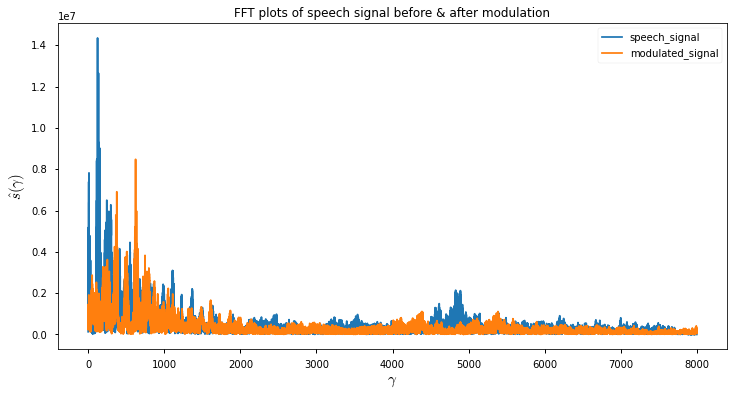

In [146]:
def plot_spec(x, Fs, max_freq=None, do_fft=True, legend_label=None):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    plt.plot(N, X, label=legend_label)
    plt.legend(loc='upper right')
    plt.title('FFT plots of speech signal before & after modulation')
    plt.xlabel(r'$\gamma$')
    plt.ylabel(r'$\hat{s}(\gamma)$')
    return N, X
    
plot_spec(speech, Fs, Fs/2, legend_label='speech_signal')
plot_spec(modulated_signal, Fs, Fs/2, legend_label='modulated_signal')

On modelling the speech signal as a continuous-time signal s(t) , and considering the carrier signal cos(2$\pi$$f_{o}$t), we find that the output of amplitude modulation using the cosine carrier cos(2$\pi$$f_{o}$t)  will have the Fourier transform:

0.5*[$\hat{s}(\gamma+$f_{o}$)$+$\hat{s}(\gamma-$f_{o}$)$]

achieving shifting up of the spectrum.